## Import Library

In [59]:
import kagglehub
import shutil
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

## Load Dataset

In [ ]:
# Download dataset
path = kagglehub.dataset_download("bhavikjikadara/retail-transactional-dataset")

# Tentukan direktori tujuan (folder tempat file .ipynb dijalankan)
target_dir = os.getcwd()

# Salin semua isi dataset ke direktori aktif
for item in os.listdir(path):
    src = os.path.join(path, item)
    dst = os.path.join(target_dir, item)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dst)

print("Dataset tersimpan di direktori kerja:", target_dir)


100%|██████████| 24.8M/24.8M [02:25<00:00, 179kB/s] 

Extracting files...


Dataset tersimpan di direktori kerja: d:\KULIAH\Semester 7\ASAH\TIM CAPSTONE\[ASAH] Capstone Project


In [2]:
df = pd.read_csv('retail_data.csv')

## Preprocessing Data

### Info

In [3]:
print("=== Informasi Dataset ===")
print(df.info())
print("\nJumlah baris dan kolom:", df.shape)

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64

### Feature Extraction

In [4]:
selected_features = [
    'Customer_ID',
    'Date', 'Year', 'Month',
    'Total_Purchases', 'Amount', 'Total_Amount',
    'Age', 'Gender', 'Income', 'Customer_Segment',
    'Product_Category', 'Product_Brand', 'Product_Type', 'products',
    'Payment_Method', 'Shipping_Method', 'Order_Status'
]

In [5]:
df_selected = df[selected_features].copy()

print("\nJumlah fitur setelah seleksi:", len(df_selected.columns))
print("Fitur yang dipertahankan:", df_selected.columns.tolist())



Jumlah fitur setelah seleksi: 18
Fitur yang dipertahankan: ['Customer_ID', 'Date', 'Year', 'Month', 'Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Product_Category', 'Product_Brand', 'Product_Type', 'products', 'Payment_Method', 'Shipping_Method', 'Order_Status']


### Duplikat

In [6]:
#Cek
duplicates = df_selected.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 16


In [7]:
#Hapus duplikat
df_clean = df_selected.drop_duplicates()
print("Duplikat telah dihapus.")

Duplikat telah dihapus.


### Nilai Kosong

In [8]:
print("\nJumlah missing value awal:")
print(df_clean.isnull().sum())


Jumlah missing value awal:
Customer_ID         308
Date                359
Year                350
Month               273
Total_Purchases     361
Amount              356
Total_Amount        350
Age                 173
Gender              317
Income              290
Customer_Segment    215
Product_Category    283
Product_Brand       281
Product_Type          0
products              0
Payment_Method      297
Shipping_Method     337
Order_Status        235
dtype: int64


In [9]:
# Customer_ID dan Date
df_clean = df_clean.dropna(subset=['Customer_ID', 'Date'])

In [10]:
# Waktu Transaksi

for col in ['Year', 'Month']:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [11]:
# Nilai Numerik
num_cols = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age']
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [12]:
# Nilai Kategorical

cat_fill = {
    'Gender': 'Unknown',
    'Income': 'Unspecified',
    'Customer_Segment': 'Unspecified',
    'Product_Category': 'Unknown',
    'Product_Brand': 'Unknown',
    'Product_Type': 'Unknown',
    'products': 'Unknown',
    'Payment_Method': 'Unspecified',
    'Shipping_Method': 'Unspecified',
    'Order_Status': 'Unknown'
}

df_clean.fillna(value=cat_fill, inplace=True)

In [13]:
print("\nJumlah nilai kosong setelah penanganan:")
print(df_clean.isnull().sum())
print(f"\nJumlah baris akhir setelah pembersihan: {df_clean.shape[0]}")


Jumlah nilai kosong setelah penanganan:
Customer_ID         0
Date                0
Year                0
Month               0
Total_Purchases     0
Amount              0
Total_Amount        0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Product_Category    0
Product_Brand       0
Product_Type        0
products            0
Payment_Method      0
Shipping_Method     0
Order_Status        0
dtype: int64

Jumlah baris akhir setelah pembersihan: 301327


In [14]:
df_clean.head()

,Customer_ID,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Payment_Method,Shipping_Method,Order_Status
0,37249.0,9/18/2023,2023.0,September,3.0,108.028757,324.086270,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,Debit Card,Same-Day,Shipped
1,69749.0,12/31/2023,2023.0,December,2.0,403.353907,806.707815,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,Credit Card,Standard,Processing
2,30192.0,4/26/2023,2023.0,April,3.0,354.477600,1063.432799,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,Credit Card,Same-Day,Processing
3,62101.0,05-08-23,2023.0,May,7.0,352.407717,2466.854021,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,PayPal,Standard,Processing
4,27901.0,01-10-24,2024.0,January,2.0,124.276524,248.553049,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,Cash,Standard,Shipped


### Outlier (dengan capping)

In [15]:
df_outlier = df_clean.copy()

In [16]:
numeric_cols = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age']

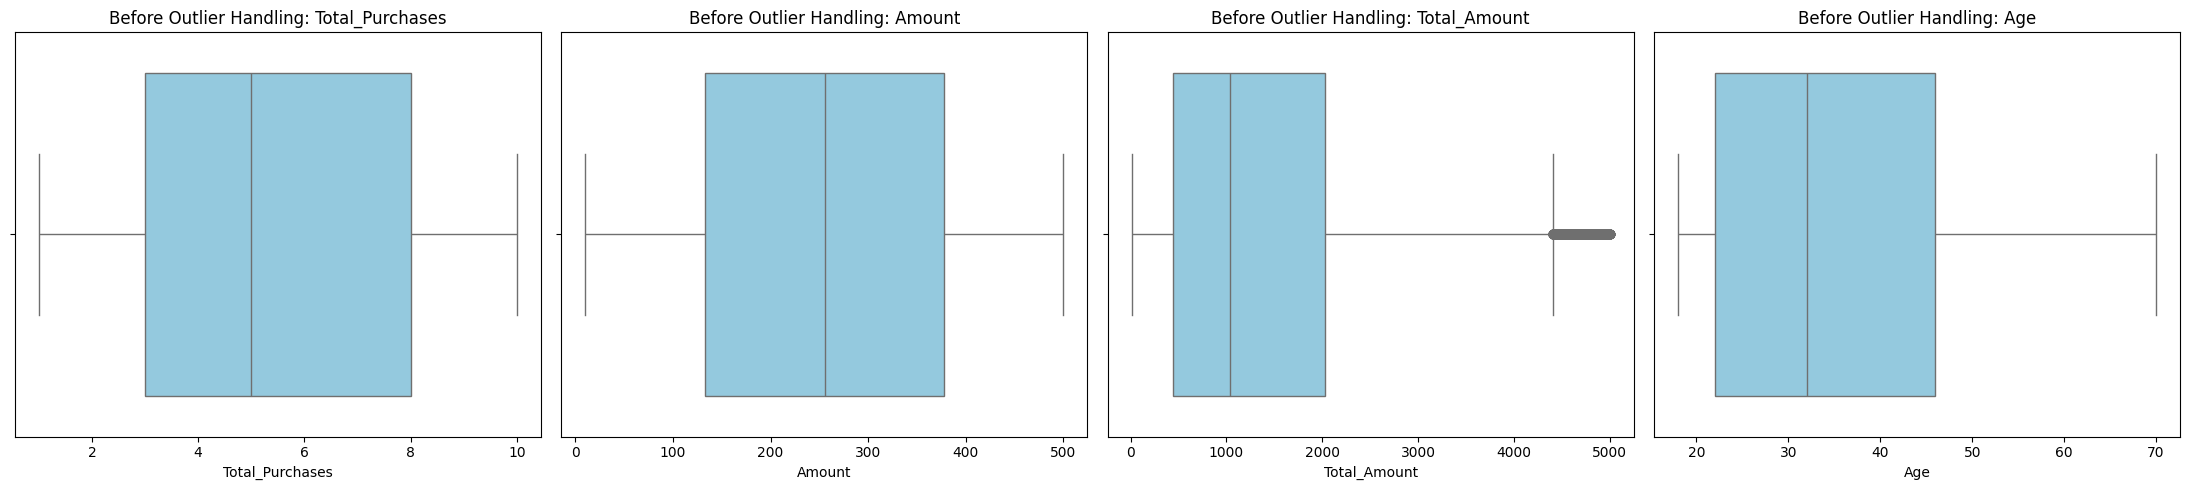

In [17]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(22, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_clean[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Before Outlier Handling: {col}")
plt.tight_layout()
plt.show()

In [18]:
for col in numeric_cols:

    Q1 = df_outlier[col].quantile(0.25)
    Q3 = df_outlier[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outlier[col] = np.where(
        df_outlier[col] > upper_bound, upper_bound,
        np.where(df_outlier[col] < lower_bound, lower_bound, df_outlier[col])
    )

In [19]:
# untuk rentang usia 15-90
df_outlier['Age'] = df_outlier['Age'].clip(lower=15, upper=90)

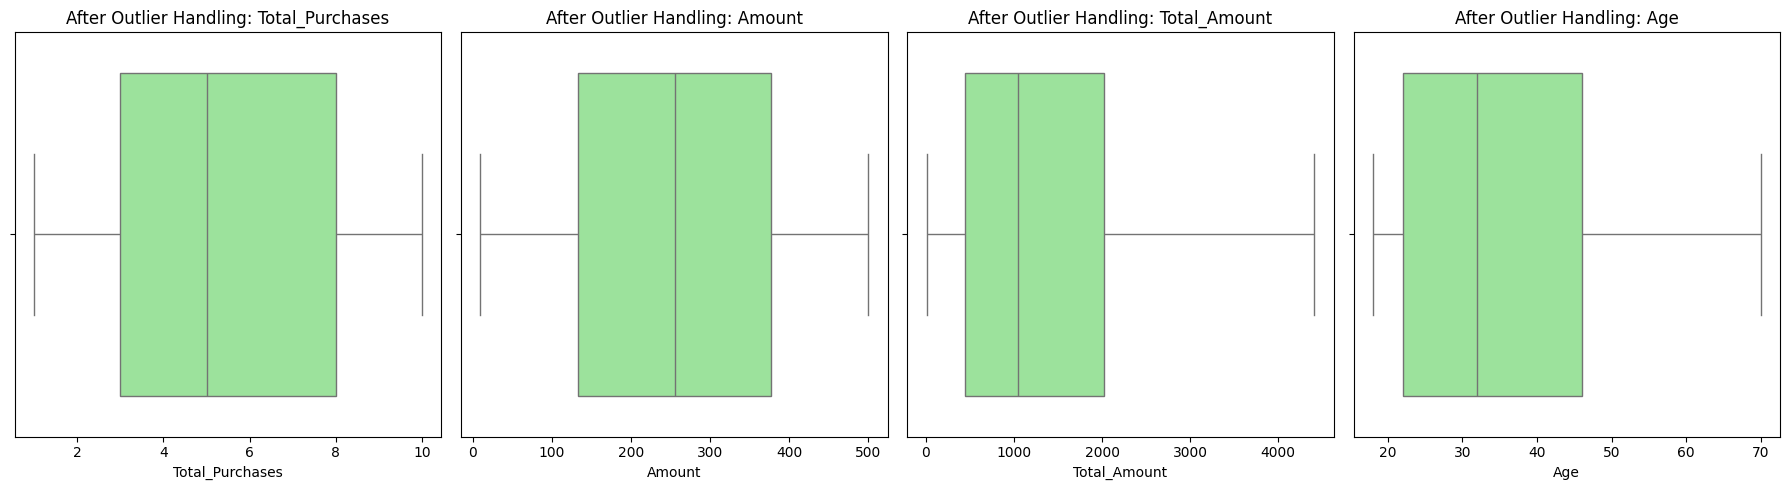

In [20]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_outlier[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"After Outlier Handling: {col}")
plt.tight_layout()
plt.show()

In [21]:
df_before = df_clean[numeric_cols].describe().T[['min', '25%', '50%', '75%', 'max']]
df_after  = df_outlier[numeric_cols].describe().T[['min', '25%', '50%', '75%', 'max']]

print("\nStatistik Sebelum Capping:")
display(df_before)

print("\nStatistik Setelah Capping:")
display(df_after)


Statistik Sebelum Capping:


,min,25%,50%,75%,max
Total_Purchases,1.000000,3.000000,5.000000,8.000000,10.000000
Amount,10.000219,133.034400,255.476952,377.514826,499.997911
Total_Amount,10.003750,439.353648,1041.169364,2027.835095,4999.625796
Age,18.000000,22.000000,32.000000,46.000000,70.000000



Statistik Setelah Capping:


,min,25%,50%,75%,max
Total_Purchases,1.000000,3.000000,5.000000,8.000000,10.000000
Amount,10.000219,133.034400,255.476952,377.514826,499.997911
Total_Amount,10.003750,439.353648,1041.169364,2027.835095,4410.557265
Age,18.000000,22.000000,32.000000,46.000000,70.000000


### Binning

In [22]:
df_binned = df_outlier.copy()

In [23]:
# BINNING AGE
age_bins = [15, 25, 35, 50, 65, 90]
age_labels = ['Youth', 'Young Adult', 'Adult', 'Senior', 'Elderly']

df_binned['Age_Group'] = pd.cut(
    df_binned['Age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True
)


In [24]:
# BINNING TOTAL_PURCHASES
df_binned['Purchase_Level'] = pd.qcut(
    df_binned['Total_Purchases'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [25]:
# BINNING AMOUNT
df_binned['Amount_Level'] = pd.qcut(
    df_binned['Amount'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [26]:
# BINNING TOTAL_AMOUNT
df_binned['Spending_Level'] = pd.qcut(
    df_binned['Total_Amount'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)


In [27]:
print("Binning numerik selesai.")
df_binned[['Age_Group','Purchase_Level','Amount_Level','Spending_Level']].head()

Binning numerik selesai.


,Age_Group,Purchase_Level,Amount_Level,Spending_Level
0,Youth,Low,Low,Low
1,Youth,Low,Very High,Medium
2,Adult,Low,High,High
3,Senior,High,High,Very High
4,Youth,Low,Low,Low


### Encode

In [28]:
# Fitur kategorikal asli
categorical_cols = [
    'Gender', 'Income', 'Customer_Segment',
    'Product_Category', 'Product_Brand', 'Product_Type', 'products',
    'Payment_Method', 'Shipping_Method', 'Order_Status'
]

# Fitur kategorikal hasil binning (ordinal)
ordinal_cols = ['Age_Group', 'Purchase_Level', 'Amount_Level', 'Spending_Level']


In [29]:
df_encoded = df_binned.copy()
le = LabelEncoder()

for col in ordinal_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [30]:
df_encoded = pd.get_dummies(
    df_encoded,
    columns=categorical_cols,
    drop_first=True  # menghindari dummy trap
)

print("Encoding kategorikal selesai.")
df_encoded.head()


Encoding kategorikal selesai.


,Customer_ID,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Age,Age_Group,Purchase_Level,...,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_Unspecified,Shipping_Method_Same-Day,Shipping_Method_Standard,Shipping_Method_Unspecified,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped,Order_Status_Unknown
0,37249.0,9/18/2023,2023.0,September,3.0,108.028757,324.086270,21.0,4,1,...,True,False,False,True,False,False,False,False,True,False
1,69749.0,12/31/2023,2023.0,December,2.0,403.353907,806.707815,19.0,4,1,...,False,False,False,False,True,False,False,True,False,False
2,30192.0,4/26/2023,2023.0,April,3.0,354.477600,1063.432799,48.0,0,1,...,False,False,False,True,False,False,False,True,False,False
3,62101.0,05-08-23,2023.0,May,7.0,352.407717,2466.854021,56.0,2,0,...,False,True,False,False,True,False,False,True,False,False
4,27901.0,01-10-24,2024.0,January,2.0,124.276524,248.553049,22.0,4,1,...,False,False,False,False,True,False,False,False,True,False


### Scalling

In [31]:
df_scaled = df_encoded.copy()

In [32]:
# Menentukan fitur numerik yang tetap numerik dan perlu scaling
numeric_to_scale = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age']


In [33]:
df_scaled = df_encoded.copy()

scaler = MinMaxScaler()
df_scaled[numeric_to_scale] = scaler.fit_transform(df_scaled[numeric_to_scale])

print("Scaling dengan MinMaxScaler selesai.")
df_scaled[numeric_to_scale].head()

Scaling dengan MinMaxScaler selesai.


,Total_Purchases,Amount,Total_Amount,Age
0,0.222222,0.200059,0.071373,0.057692
1,0.111111,0.802766,0.181046,0.019231
2,0.222222,0.703018,0.239386,0.576923
3,0.666667,0.698794,0.558305,0.730769
4,0.111111,0.233218,0.054209,0.076923


### Visualisasi

#### Info Dataset & Statistik Umum

In [72]:
df_final = df_scaled.copy()


In [73]:
print("=== INFORMASI DATASET FINAL ===")
df_final.info()

=== INFORMASI DATASET FINAL ===
<class 'pandas.core.frame.DataFrame'>
Index: 301327 entries, 0 to 302009
Columns: 403 entries, Customer_ID to Order_Status_Unknown
dtypes: bool(391), float64(6), int64(4), object(2)
memory usage: 142.2+ MB


In [38]:
print("\n=== STATISTIK NUMERIK ===")
display(df_final.describe())


=== STATISTIK NUMERIK ===


,Customer_ID,Year,Total_Purchases,Amount,Total_Amount,Age,Age_Group,Purchase_Level,Amount_Level,Spending_Level
count,301327.000000,301327.000000,301327.000000,301327.000000,301327.000000,301327.000000,301327.000000,301327.000000,301327.000000,301327.000000
mean,55010.306693,2023.164917,0.484375,0.500352,0.307663,0.336149,2.458309,1.303876,1.501180,1.501160
std,26005.512045,0.371106,0.318509,0.288386,0.254177,0.288798,1.565397,1.074768,1.117508,1.117517
min,10000.000000,2023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32473.000000,2023.000000,0.222222,0.251091,0.097567,0.076923,1.000000,0.000000,1.000000,1.000000
50%,55016.000000,2023.000000,0.444444,0.500975,0.234326,0.269231,3.000000,1.000000,2.000000,2.000000
75%,77512.000000,2023.000000,0.777778,0.750033,0.458540,0.538462,4.000000,2.000000,2.500000,2.500000
max,99999.000000,2024.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000


In [39]:
print("\n=== COUNT UNIQUE VALUE PER KOLOM ===")
display(df_final.nunique())


=== COUNT UNIQUE VALUE PER KOLOM ===


Customer_ID                    86753
Date                             366
Year                               2
Month                             12
Total_Purchases                   10
                               ...  
Shipping_Method_Unspecified        2
Order_Status_Pending               2
Order_Status_Processing            2
Order_Status_Shipped               2
Order_Status_Unknown               2
Length: 403, dtype: int64

#### Distribusi Fitur Numerik

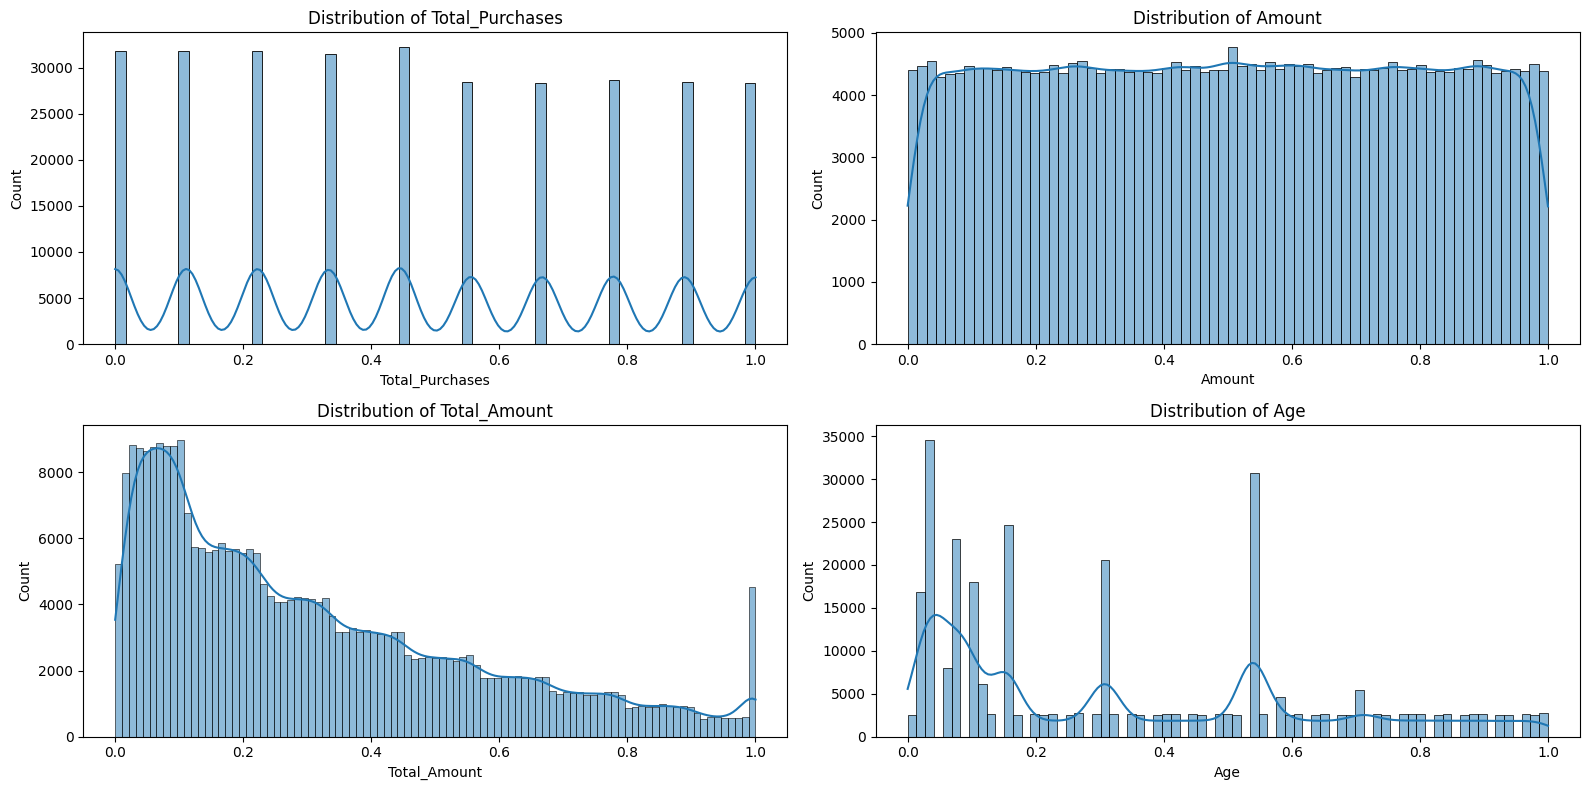

In [40]:
numeric_cols = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age']

plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_final[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


#### Distribusi Fitur Kategorikal

C:\Users\Syamsi\AppData\Local\Temp\ipykernel_1404\955175985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x=col, palette="Set2")
C:\Users\Syamsi\AppData\Local\Temp\ipykernel_1404\955175985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x=col, palette="Set2")
C:\Users\Syamsi\AppData\Local\Temp\ipykernel_1404\955175985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x=col, palette="Set2")
C:\Users\Syamsi\AppData\Local\Temp\ipykernel_1404\955175985.py:6: FutureWarning: 

Passi

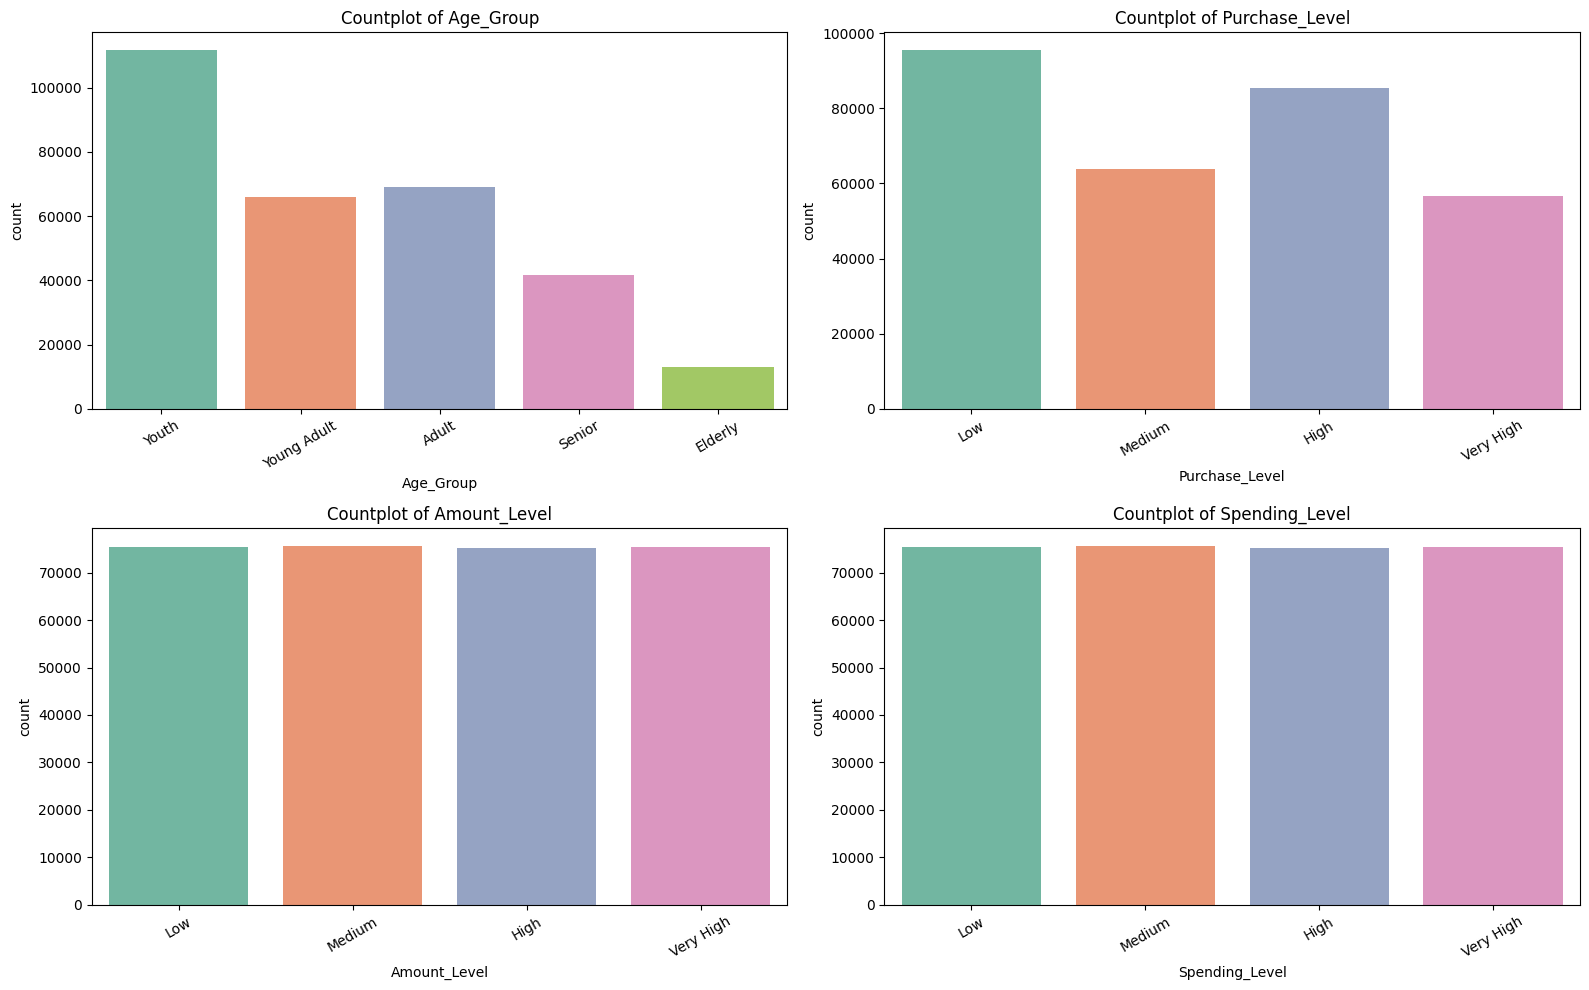

In [41]:
cat_cols = ['Age_Group', 'Purchase_Level', 'Amount_Level', 'Spending_Level']

plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_binned, x=col, palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### Heatmap Korelasi Numerik

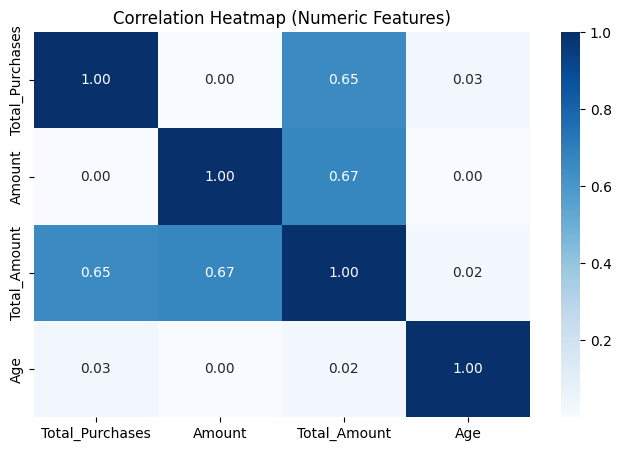

In [42]:
corr = df_final[numeric_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


#### Analisis Customer Behavior

C:\Users\Syamsi\AppData\Local\Temp\ipykernel_1404\2090070547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_binned, x='Age_Group', y='Total_Amount', estimator='mean', palette="viridis")


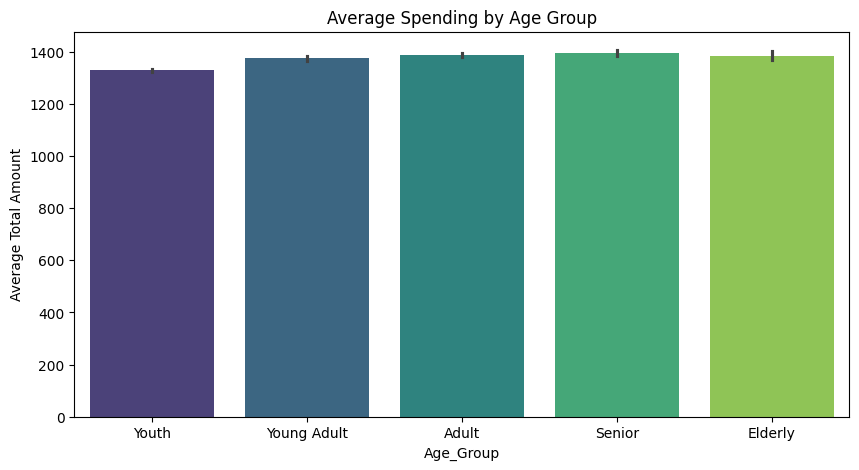

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_binned, x='Age_Group', y='Total_Amount', estimator='mean', palette="viridis")
plt.title("Average Spending by Age Group")
plt.ylabel("Average Total Amount")
plt.show()


C:\Users\Syamsi\AppData\Local\Temp\ipykernel_1404\448553710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_binned, x='Purchase_Level', y='Total_Amount', estimator='mean', palette="magma")


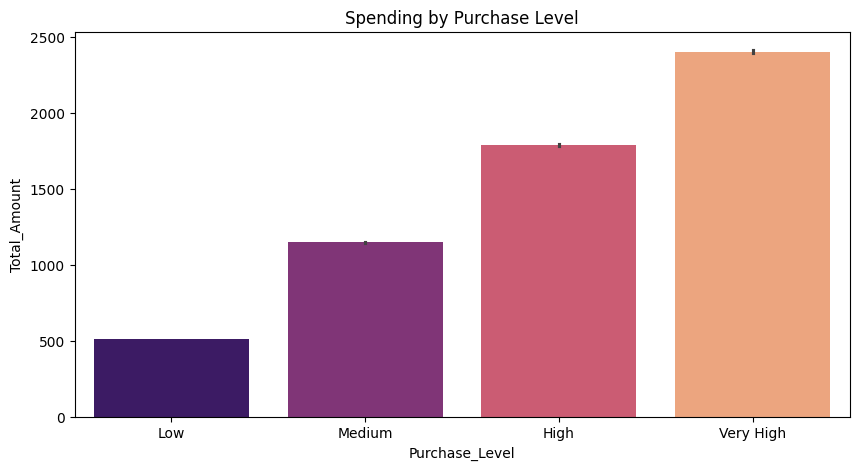

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_binned, x='Purchase_Level', y='Total_Amount', estimator='mean', palette="magma")
plt.title("Spending by Purchase Level")
plt.show()


#### Analisis Produk & Transaksi

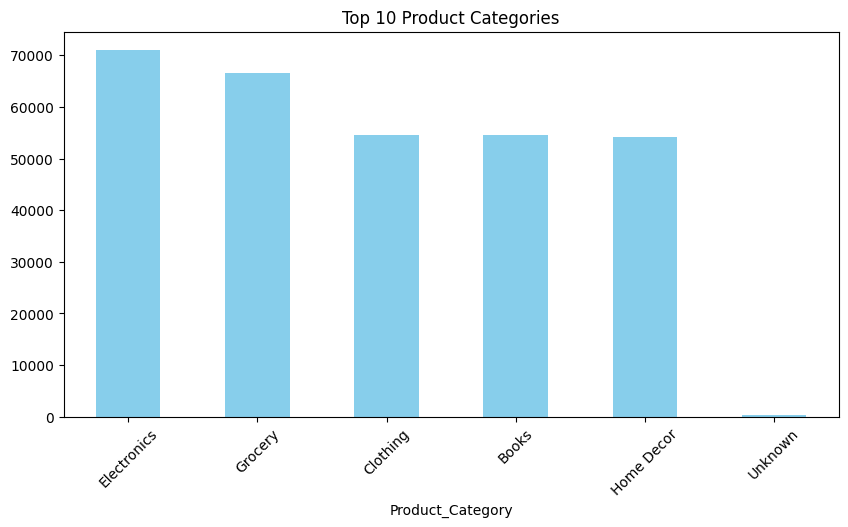

In [45]:
df_binned['Product_Category'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Product Categories")
plt.xticks(rotation=45)
plt.show()


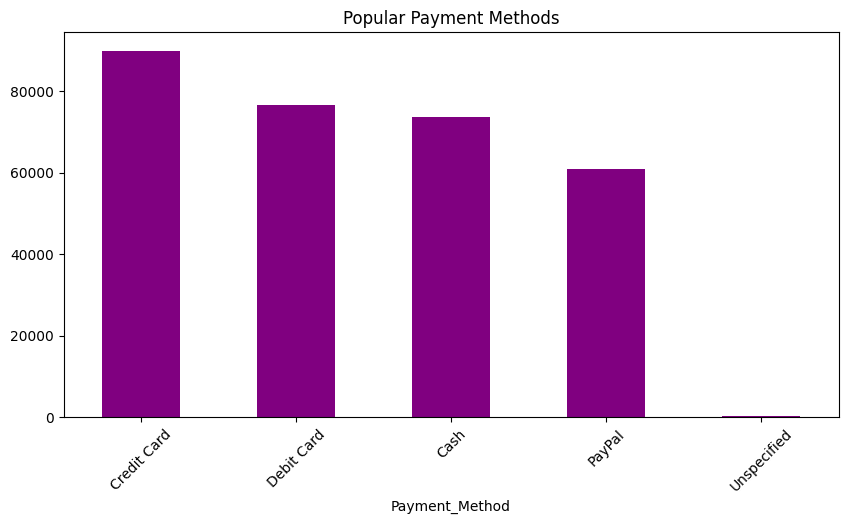

In [46]:
df_binned['Payment_Method'].value_counts().plot(kind='bar', figsize=(10,5), color='purple')
plt.title("Popular Payment Methods")
plt.xticks(rotation=45)
plt.show()


#### Analisis Time Series

In [77]:
df_final.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 301327 entries, 0 to 302009
Data columns (total 403 columns):
 #    Column                                           Dtype  
---   ------                                           -----  
 0    Customer_ID                                      float64
 1    Date                                             object 
 2    Year                                             float64
 3    Month                                            object 
 4    Total_Purchases                                  float64
 5    Amount                                           float64
 6    Total_Amount                                     float64
 7    Age                                              float64
 8    Age_Group                                        int64  
 9    Purchase_Level                                   int64  
 10   Amount_Level                                     int64  
 11   Spending_Level                                   int64  
 12   Gende

In [78]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'], errors='coerce', dayfirst=True)


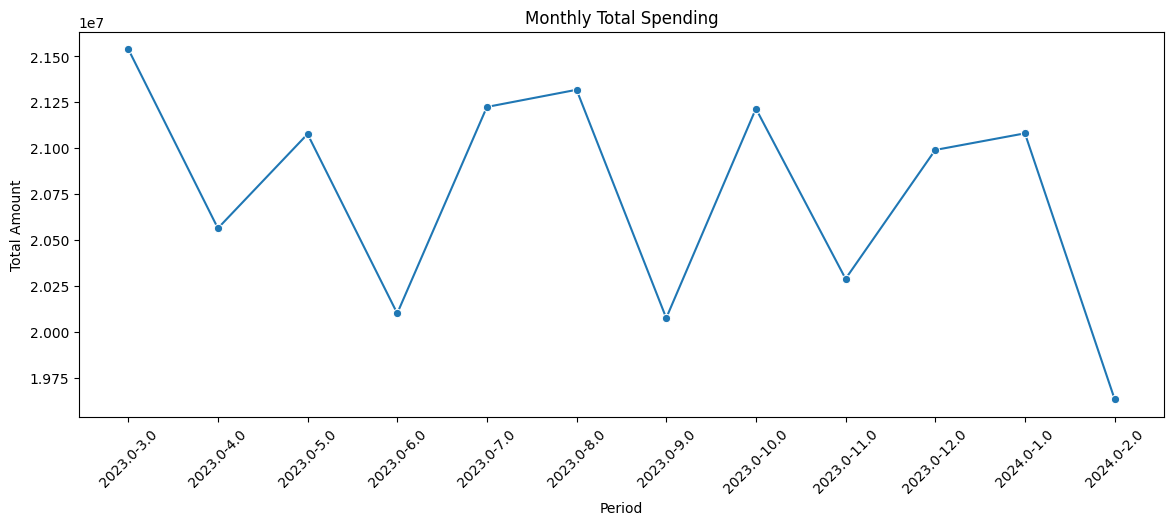

In [79]:
df_ts['Year'] = df_ts['Date'].dt.year
df_ts['Month'] = df_ts['Date'].dt.month

monthly_sales = df_ts.groupby(['Year','Month'])['Total_Amount'].sum().reset_index()

# Format periode YYYY-MM (dengan leading zero)
monthly_sales['Period'] = (
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(14,5))
sns.lineplot(data=monthly_sales, x='Period', y='Total_Amount', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Total Spending")
plt.ylabel("Total Amount")
plt.show()


#### RFM Analysis

In [82]:
# Tentukan tanggal acuan (maximum date + 1 hari)
reference_date = df_ts['Date'].max() + pd.Timedelta(days=1)

In [89]:
rfm = df_ts.groupby('Customer_ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,   # Recency
    'Customer_ID': 'count',                              # Frequency
    'Total_Amount': 'sum'                                # Monetary
}).rename(columns={
    'Date': 'Recency',
    'Customer_ID': 'Frequency',
    'Total_Amount': 'Monetary'
}).reset_index()

print("RFM Head:")
rfm.head()

RFM Head:


,Customer_ID,Recency,Frequency,Monetary
0,10000.0,103.0,4,5007.566357
1,10001.0,105.0,5,8136.462824
2,10002.0,95.0,5,4104.013951
3,10003.0,228.0,2,2340.496447
4,10004.0,31.0,2,2356.516683


In [88]:
# Membuat skor 1–4 (quartile)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4])

# Gabungkan skor
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

print("\nRFM Score Head:")
rfm.head()


RFM Score Head:


,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,10000.0,103.0,4,5007.566357,2,3,3,233
1,10001.0,105.0,5,8136.462824,2,3,4,234
2,10002.0,95.0,5,4104.013951,3,3,2,332
3,10003.0,228.0,2,2340.496447,1,1,2,112
4,10004.0,31.0,2,2356.516683,4,1,2,412


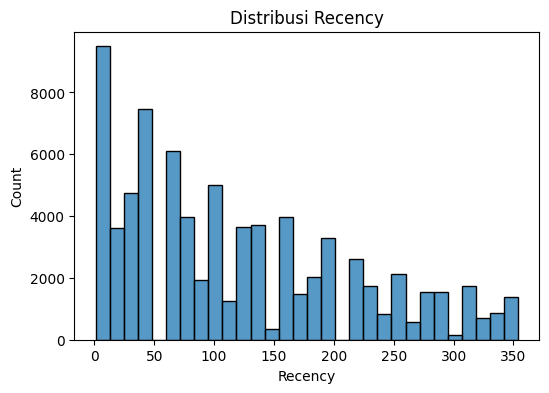

In [85]:
plt.figure(figsize=(6,4))
sns.histplot(rfm['Recency'], bins=30)
plt.title("Distribusi Recency")
plt.show()


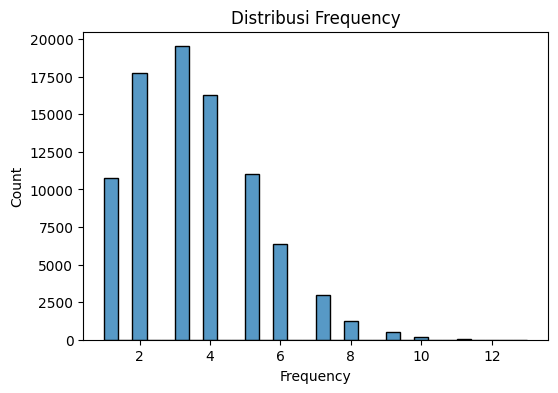

In [86]:
plt.figure(figsize=(6,4))
sns.histplot(rfm['Frequency'], bins=30)
plt.title("Distribusi Frequency")
plt.show()


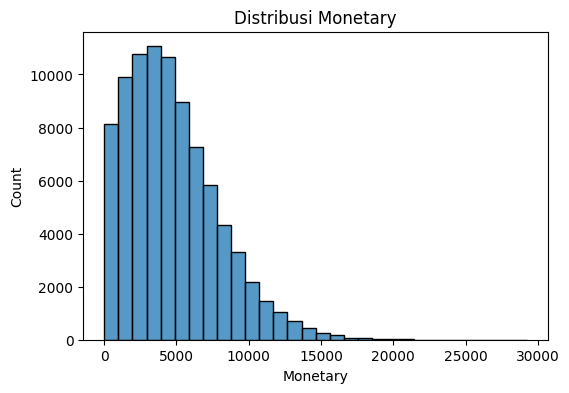

In [87]:
plt.figure(figsize=(6,4))
sns.histplot(rfm['Monetary'], bins=30)
plt.title("Distribusi Monetary")
plt.show()
